In [15]:
import sys
sys.path.insert(0, '../')

# from PlexSim.Models import Models
from PlexSim.Models.Potts import Potts
# from PlexSim.Models.RBN import RBN
from PlexSim.Models.FastIsing import Ising
# from matplotlib import style; style.use('seaborn-notebook')
# matplotlib.pyplot as plt,
import networkx as nx,  numpy as np
# from Utils import IO
# %matplotlib notebook
%matplotlib widget
n = 8 
# g = nx.erdos_renyi_graph(n, .2)
# g = nx.complete_graph(50)

# dataDir = '../Graphs' # relative path careful
# df    = IO.readCSV('{}/Graph_min1_1.csv'.format(dataDir), header = 0, index_col = 0)
# h     = IO.readCSV('{}/External_min1_1.csv'.format(dataDir), header = 0, index_col = 0)
# g   = nx.from_pandas_adjacency(df) 
# attr = {node : \
#         dict(H = row['externalField']) for node, row in h.iterrows()}
# nx.set_node_attributes(g, attr)

# g = nx.erdos_renyi_graph(10, .4)
# g = nx.random_regular_graph(4, 10)
g = nx.grid_2d_graph(n, n)
# fig, ax = plt.subplots(); nx.draw(g, ax = ax); fig.show()
# states = np.arange(0, 1000).tolist()
# g = nx.path_graph(3)

states = np.arange(0, 5).tolist()

n = 0
n = 1
n = np.inf
m =  Ising(graph = g,
           t = np.inf\
#            agentStates = states,\
          )
m = Ising(graph = g, t = np.inf)
import matplotlib.pyplot as plt
import ipywidgets as ipy
%matplotlib notebook
m.reset()
m.updateType = 'sync'
# m.t = 0.001# np.inf
n = int(np.sqrt(m.nNodes))
res = m.simulate(100).reshape(-1, n, n)
print(res.shape)
%matplotlib widget

fig, ax = plt.subplots(figsize = (4, 4))
h = ax.imshow(res[0].reshape(n, n))

timeSlider = ipy.widgets.IntSlider(min = 0, max = res.shape[0] - 1, \
                                   value = 0, orientation = 'horizontal')
@ipy.interact(time = timeSlider)
def update(time):
    h.set_data(res[time])
    fig.canvas.flush_events()
    fig.canvas.draw(); 
fig.show()
print(m.t)
print(m.beta)

(100, 8, 8)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=0, description='time', max=99), Output()), _dom_classes=('widget-interac…

inf
0.0


In [16]:
m.simulate(2)

array([[-1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1,
        -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,
        -1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,
         1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1],
       [-1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1,
        -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,
        -1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,
         1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1]])

<ipython-input-10-fac9100c6ebb>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


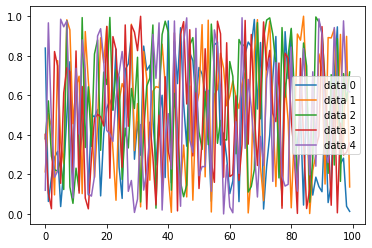

Using circular_layout


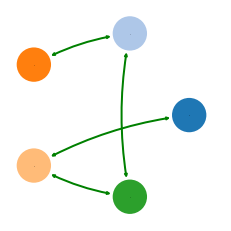

In [2]:
import networkx as nx
from Utils.plotting import addGraphPretty
g = nx.erdos_renyi_graph(5, .3)

fig, ax = plt.subplots()
pos =  addGraphPretty(g, ax = ax, pos = nx.kamada_kawai_layout,\
                     circle = dict(\
                                  radius = .2))
# nx.draw(g, ax = ax, pos = pos)
ax.axis('square')
ax.axis('off')
fig.savefig('kamada3.png', dpi = 300, transparent = 1,\
           bbox_inches = 'tight', \
           pad_inches = 0)

In [3]:
tmp = []

for i in range(1000):
    m.reset()
    res = m.simulate(1000)[-10:]
    tmp.append(res)

tmp = np.array(tmp)
from collections import Counter
n, t , N = tmp.shape

counters = {}
for i in range(t):
    d = [tuple(i) for i in tmp[:, i, :]]
    
    di = Counter(d)
    
    for j in di:
        counters[j] = counters.get(j, []) + [di[j]]

print(len(counters))

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
xr = np.arange(len(counters))
print(next(iter(counters)))
for idx, counter in enumerate(counters):
    ax.plot(counter)
#     [ax.bar(xr[idx], i) for i in counter.values()]
#     ax.fill_between(xr, di.values())
#     ax.set_xscale('log')
fig.show()

In [ ]:
def sig(x, a, b, c):
    return 1/(1 + np.exp(-b * (x - c)))

def exp(x, a, b):
    return np.exp(-b * (x - a))
from scipy import interpolate
func = sig
# f = interpolate.BSpline(temps, mag, k = 1, extrapolate  = 0)
from scipy import optimize
a, b = optimize.curve_fit(func, temps, mag, maxfev = 10000)
theta = .75
t = optimize.fmin(lambda x: abs(func(x, *a) - theta * mag.max()), 0)
m.t = t
%matplotlib widget
xr = np.linspace(temps.min(), temps.max())
fig, ax = plt.subplots(figsize = (10, 3))
ax.scatter(temps, mag)
tax = ax.twinx()
tax.scatter(temps, sus, color = 'red')

ax.plot(xr, func(xr, *a), linestyle = 'dashed', color = 'k')
# ax.plot(xr, f(xr), linestyle = 'dashed', color = 'green')

ax.set(xlabel = 'temperature', ylabel = 'average mag')
tax.set_ylabel('suseptibility')
# idx = np.argmin(abs(mag - .5 * mag.max()))
ax.axvline(t, linestyle = 'dashed')
# ax.set(xlim = (0, 20))
# ax.set(xscale = 'log')
fig.show()



In [2]:
import matplotlib.pyplot as plt
import ipywidgets as ipy
%matplotlib notebook
m.updateType = 'sync'
m.reset()
m.t = 0.001# np.inf
m.reset()
n = int(np.sqrt(m.nNodes))
res = m.simulate(500).reshape(-1, n, n)
print(res.shape)
%matplotlib widget

fig, ax = plt.subplots(figsize = (4, 4))
h = ax.imshow(res[0].reshape(n, n))


timeSlider = ipy.widgets.IntSlider(min = 0, max = res.shape[0] - 1, \
                                   value = 0, orientation = 'horizontal')
@ipy.interact(time = timeSlider)
def update(time):
    h.set_data(res[time])
    fig.canvas.flush_events()
    fig.canvas.draw(); 
fig.show()


In setter sync
(500, 128, 128)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=0, description='time', max=499), Output()), _dom_classes=('widget-intera…

In [8]:
def g(**kwargs):
    print("in G", kwargs)
    f(**kwargs)
    print(kwargs.get('kwargs'))
def f(**kwargs):
    print("in F", kwargs)
g(kwargs = 3)

in G {'kwargs': 3}
in F {'kwargs': 3}
3


In [ ]:
from matplotlib.animation import FuncAnimation
m.reset()
m.updateType = '.5'
res = m.simulate(1000)
N, nodes = res.shape
# N = 1000
# print(N); assert 0
%matplotlib qt5
fig, ax = plt.subplots()
h = ax.imshow(res[0].reshape(n,n))

# ax.set_xlim(0, 32)
# ax.set_ylim(0, 32)
ax.set_position([0.05, 0.05, .95, .85])
ax.axis('tight')
mng = plt.get_current_fig_manager()
# mng.frame.Maximize(True)
# mng.window.state("zoomed")
def update(i):
    ax.set_title(f't={i}', fontsize = 40)
    h.set_data(res[i].reshape(n,n))
    f = plt.gcf()
    f.set_facecolor('black')
    fig.canvas.flush_events()
    fig.canvas.draw()
    
    
anim = FuncAnimation(fig, update, \
                    blit = 1, \
                    interval = 100,\
                    frames = np.linspace(0, N - 1, 50, dtype = int))
anim.save('lowtemp_potts_5.gif', \
          writer = 'matplotlib.animation.PillowWriter',\
         )
print('done')

In [ ]:
fig, ax = plt.subplots()
x = np.random.standard_normal(100)

x = np.random.rand(100)
y = 2 + 3  * x + 4 * np.random.standard_normal(x.size)


g = nx.hexagonal_lattice_graph(10, 10)
states = np.arange(0, 4).tolist()
m =  Potts.Potts(graph = g, \
                 agentStates = states,\
                 updateType = '.25')

y = m.simulate(100).mean(0)

print(y.shape)
x = np.asarray(g.nodes())
print(x.shape)
fig, ax = plt.subplots()
h = ax.hexbin(*x.T, C = y)
fig.show()

In [ ]:
%load_ext autoreload
%autoreload 2
from Models.FastIsing import Ising
from Toolbox import infcy

m = Ising(g)
m.matchMagnetization()

m.matchMagnetization()
snapshots = infcy.getSnapShots(m, 100)
infcy.runMC(m, snapshots, 10, 30)

In [ ]:
a = np.random.rand(10, 3)
np.isfortran(a)

In [ ]:
ratios = m.matched.get('ratios').items()
ratios = np.asarray(list(ratios))

print(ratios.shape, ratios)
fig, ax = plt.subplots()
ax.plot(*m.matched.get('mag')[[0, 1]], linestyle = '-', marker = '.')
ax.scatter(ratios[:,1], ratios[:, 0], color = 'red')
fig.show()

In [ ]:
from IPython.display import display, clear_output
from ipywidgets import interact, fixed, IntSlider, HBox, Layout, Output, VBox
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook

def rotate(theta, xs, ys):
    new_xs = xs * np.cos(np.deg2rad(theta)) - ys * np.sin(np.deg2rad(theta))
    new_xs -= new_xs.min()
    new_ys = xs * np.sin(np.deg2rad(theta)) + ys * np.cos(np.deg2rad(theta))
    new_ys -= new_ys.min()
    return new_xs, new_ys

out = Output(layout={'width': '300px', 'height': '300px'})
xs = np.random.randint(0, 10, 50) 
ys = np.random.randint(0, 10, 50) 

fig, ax = plt.subplots(figsize = (4,4))
scat, = ax.plot(xs, ys, 'kx', markersize=1000)      
ax.grid(which='both', color='.25', lw=.1)
ax.set_aspect('equal'), ax.set_title('Rotate')
fig.show()
def update_plot(change): 
    theta = change['new'] # new slider value 
    with out: 
        clear_output(wait=True)
#         fig = plt.figure(figsize=(4,4))
#         ax = fig.add_subplot(111)
        new_xs, new_ys = rotate(theta, xs, ys) 
        scat.set_data(new_xs, new_ys)
#         ax.relim()
        ax.set_xlim(new_xs.min() - 500, new_xs.max() + 500)
        ax.set_ylim(new_ys.min() - 500, new_ys.max() + 500)
        fig.canvas.flush_events()
        fig.canvas.draw()
        fig.show()
#     print('Done')
        

slider = IntSlider(min=-180, max=180, step=5, value=0, orientation='vertical') 
slider.observe(update_plot, 'value')
update_plot({'new': slider.value}) 
display(HBox([out, slider]))

In [ ]:
scat.get_data()